The loan default dataset has 8 variables and 850 records, each record being loan
default status for each customer. Each Applicant was rated as “Defaulted” or
“Not-Defaulted”. New applicants for loan application can also be evaluated on
these 8 predictor variables and classified as a default or non-default based on
predictor variables.

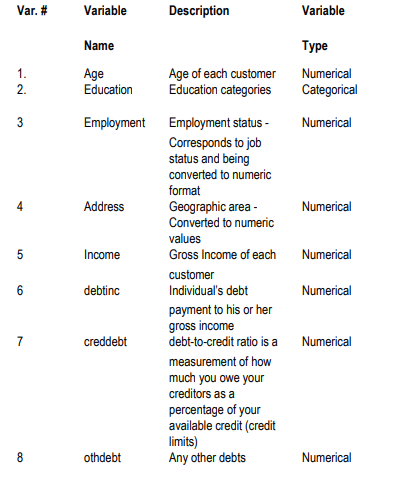

In [35]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [36]:
bank_df = pd.read_csv('bank-loan.csv')

In [37]:
bank_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [38]:
bank_df.shape

(850, 9)

In [39]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


### Missing Value

In [40]:
bank_df.isna().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

From above result we can see that the our dependent variable got missing values.
Since its our dependent variable we cannot impute this using any imputation method becuase our goal is to predict the those values.
So for now we can use these as our test case.

#### Since default is our dependent variable we make it as our test data.

In [41]:
test_df = bank_df[bank_df['default'].isna()]
test_df = test_df.reset_index(drop=True)

In [42]:
test_df.shape

(150, 9)

In [43]:
bank_df = bank_df[bank_df['default'].notna()]
bank_df = bank_df.reset_index(drop=True)

In [44]:
bank_df.shape

(700, 9)

In [45]:
bank_df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [46]:
for i in bank_df.columns:
    print(i,':',bank_df[i].nunique())

age : 37
ed : 5
employ : 32
address : 31
income : 114
debtinc : 231
creddebt : 695
othdebt : 699
default : 2


### Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5095122f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f509512d668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5095100f98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f509512dd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f509512de80>],
 'means': []}

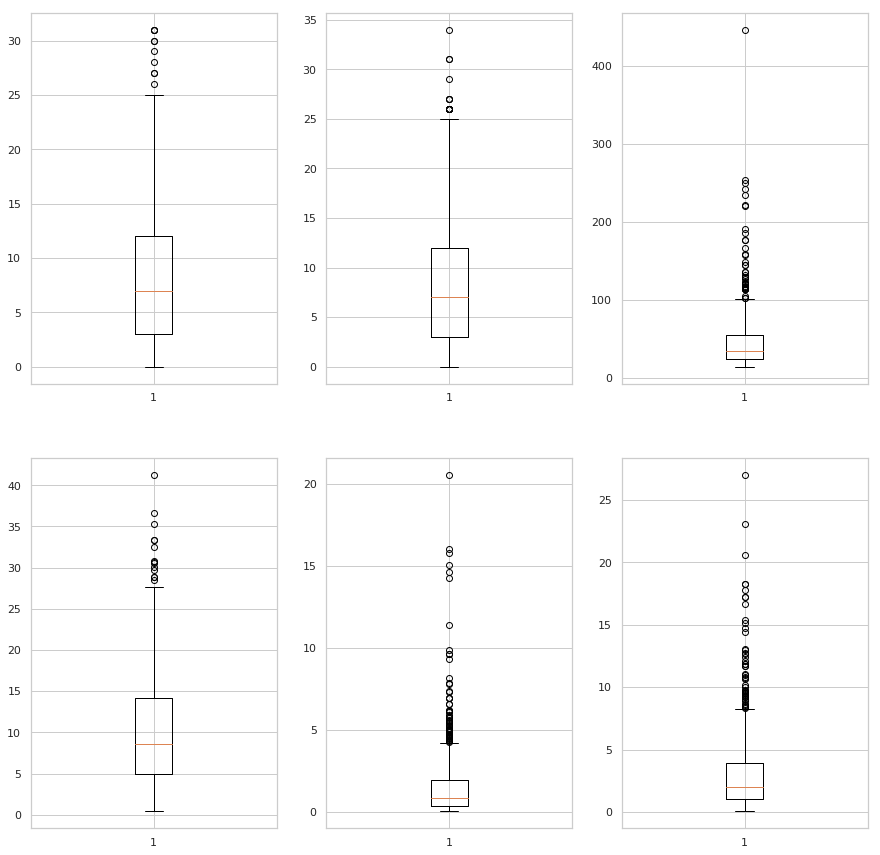

In [47]:
%matplotlib inline
fig, ax = plt.subplots(2,3, figsize=(15,15))
ax[0,0].boxplot(bank_df['employ'])
ax[0,1].boxplot(bank_df['address'])
ax[0,2].boxplot(bank_df['income'])
ax[1,0].boxplot(bank_df['debtinc'])
ax[1,1].boxplot(bank_df['creddebt'])
ax[1,2].boxplot(bank_df['othdebt'])

The plot above we can find that our varibles have outliers.

Now we will try to find outliers.

In [48]:
columns = ('age','ed','employ','address','income','debtinc','creddebt','othdebt')
for i in columns:
    print('coloumn name :',i)
    q75, q25 = np.percentile(bank_df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print('min :', min)
    print('max :', max)
    bank_df = bank_df.drop(bank_df[bank_df.loc[:,i] < min].index)
    bank_df = bank_df.drop(bank_df[bank_df.loc[:,i] > max].index)

coloumn name : age
min : 12.5
max : 56.5
coloumn name : ed
min : -0.5
max : 3.5
coloumn name : employ
min : -12.0
max : 28.0
coloumn name : address
min : -10.5
max : 25.5
coloumn name : income
min : -19.5
max : 96.5
coloumn name : debtinc
min : -8.950000000000001
max : 28.25
coloumn name : creddebt
min : -1.634563125
max : 3.593785875
coloumn name : othdebt
min : -1.9246537499999998
max : 5.72496825


In [49]:
bank_df.shape

(514, 9)

For now we have removed the outliers

In [50]:
bank_df.to_csv('cleaned-bank-loan.csv')

In [51]:
corr = bank_df.corr()

plt.figure(figsize=(10,10))
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1,-0.0676846,0.435503,0.583292,0.485396,-0.0692424,0.175831,0.24412,-0.147362
ed,-0.0676846,1,-0.18036,-0.0170353,0.160763,-0.0167368,0.057866,0.0974625,0.0940945
employ,0.435503,-0.18036,1,0.291883,0.64377,-0.228787,0.154201,0.211156,-0.33763
address,0.583292,-0.0170353,0.291883,1,0.300575,-0.0456196,0.153541,0.137866,-0.167682
income,0.485396,0.160763,0.64377,0.300575,1,-0.261934,0.278381,0.364303,-0.214697
debtinc,-0.0692424,-0.0167368,-0.228787,-0.0456196,-0.261934,1,0.554254,0.650935,0.34503
creddebt,0.175831,0.057866,0.154201,0.153541,0.278381,0.554254,1,0.454525,0.201839
othdebt,0.24412,0.0974625,0.211156,0.137866,0.364303,0.650935,0.454525,1,0.0916694
default,-0.147362,0.0940945,-0.33763,-0.167682,-0.214697,0.34503,0.201839,0.0916694,1


<Figure size 720x720 with 0 Axes>

#### Top correlating variables

In [52]:
corr.unstack().sort_values().drop_duplicates()

default   employ     -0.337630
debtinc   income     -0.261934
          employ     -0.228787
default   income     -0.214697
employ    ed         -0.180360
default   address    -0.167682
          age        -0.147362
age       debtinc    -0.069242
          ed         -0.067685
debtinc   address    -0.045620
address   ed         -0.017035
ed        debtinc    -0.016737
          creddebt    0.057866
othdebt   default     0.091669
default   ed          0.094095
othdebt   ed          0.097463
address   othdebt     0.137866
creddebt  address     0.153541
employ    creddebt    0.154201
ed        income      0.160763
age       creddebt    0.175831
creddebt  default     0.201839
othdebt   employ      0.211156
age       othdebt     0.244120
income    creddebt    0.278381
address   employ      0.291883
          income      0.300575
debtinc   default     0.345030
othdebt   income      0.364303
employ    age         0.435503
othdebt   creddebt    0.454525
income    age         0.485396
debtinc 

<p> Here, debtinc and othdebt are most highly postiviely correlated with value of 0.6509
followed by income and othdebt with value of 0.6438. From above result debtinc is also correlated with creddebt with a score of 0.5542<p>

From above correaltion anaysis we saw that othdebt and debtinc are correlated quite highly. so here we are going to plot both variables 

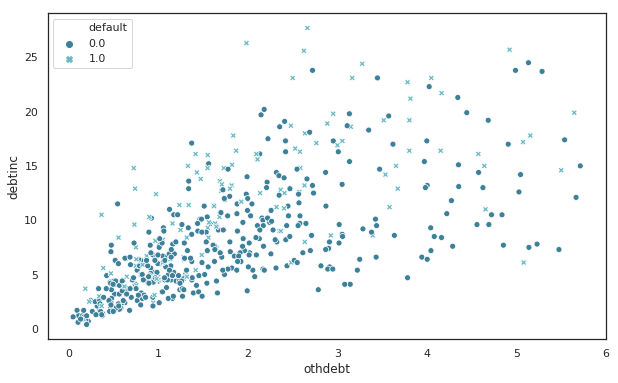

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'othdebt', y = 'debtinc', hue="default",style="default", data= bank_df, palette="GnBu_d")


Here, we can see values are going up and down quite frequnetly but the overall the trend is in postive direction. 
So,we can infere that when othdeb increases then debtinc also increases, which is quite obvious. 

here we are trying to explore the relationship between employ and income

[(0, 100)]

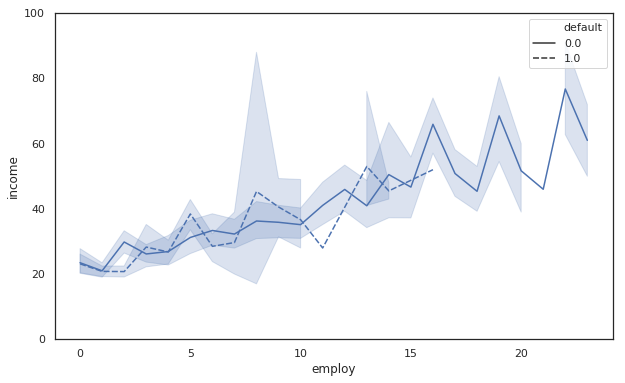

In [70]:
plt.figure(figsize=(10,6))
sns.set_style("white")
ax = sns.lineplot(x= 'employ', y = 'income',style="default", data= bank_df, palette="GnBu_d")
ax.set(ylim=(0, 100))

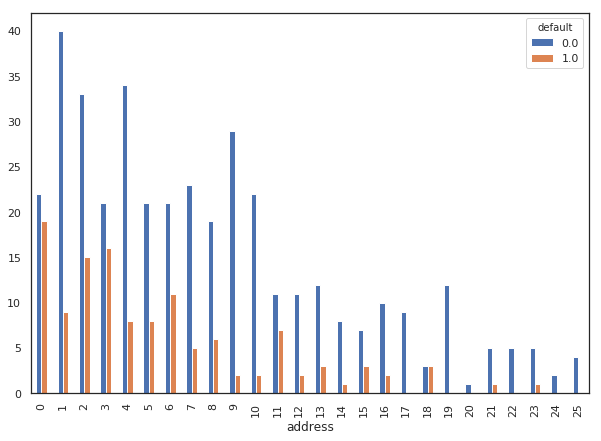

In [56]:
pd.crosstab(bank_df.address,bank_df.default).plot(kind='bar',figsize=(10,7))

Here we can that this variable is skewed to the left.

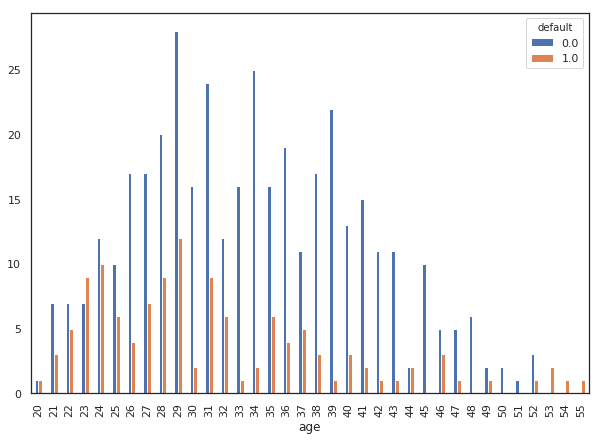

In [57]:

pd.crosstab(bank_df.age,bank_df.default).plot(kind='bar',figsize=(10,7))

<Figure size 720x720 with 0 Axes>

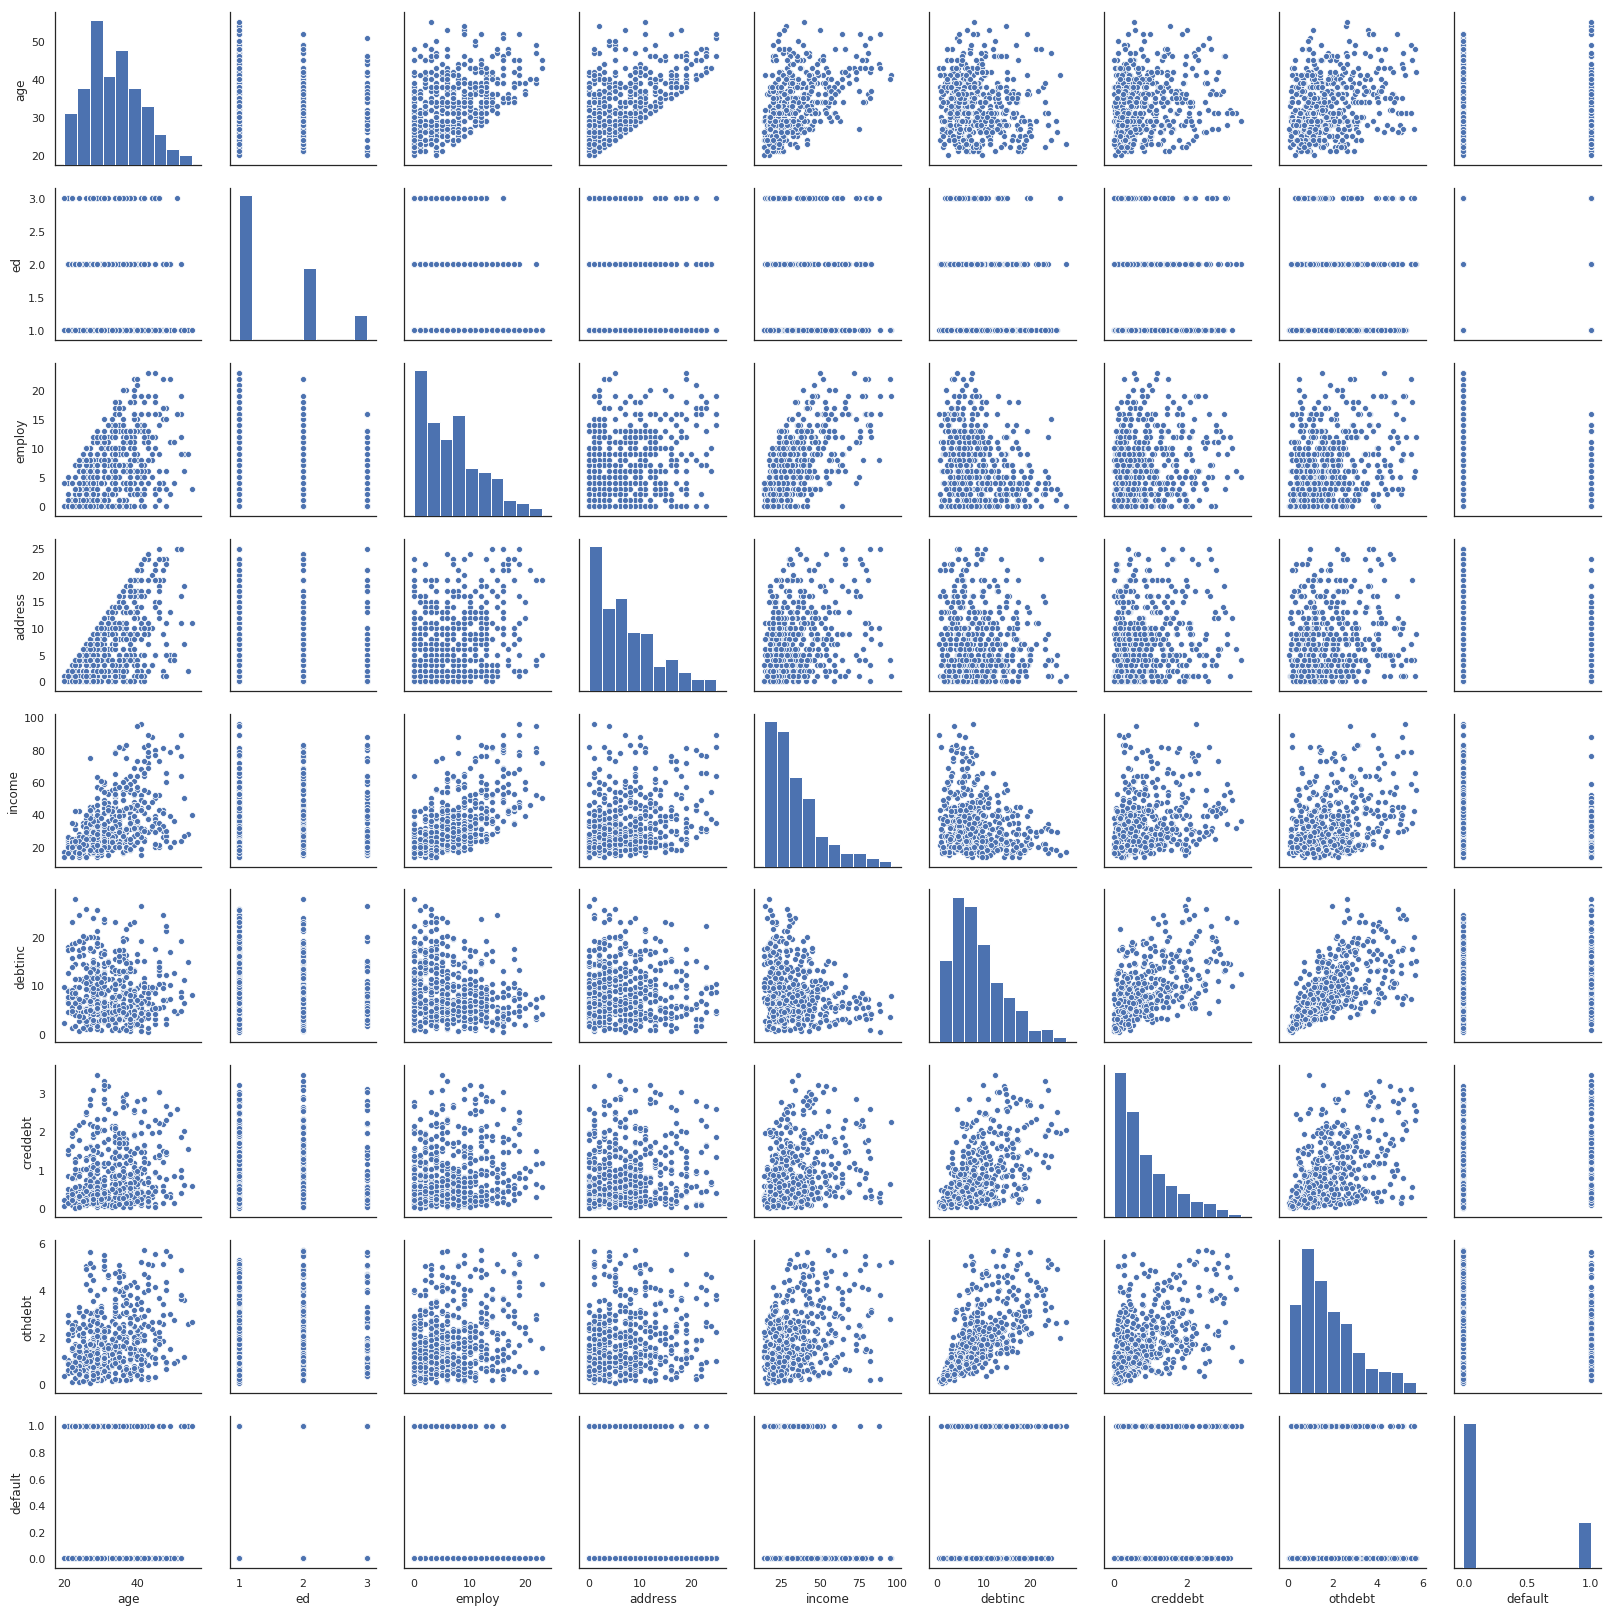

In [78]:
plt.figure(figsize=(10,10))

sns.pairplot(bank_df)

#### Chi square test for only ed only categotical variable

In [93]:
from scipy.stats import chi2_contingency

for i in columns:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bank_df['ed'], bank_df[i]))
    print(p)

age
0.05360260632396172
ed
3.0510092952312575e-221
employ
0.30459558799406816
address
0.10931526963606282
income
0.11939024629440544
debtinc
0.6787774974939011
creddebt
0.45981549537530253
othdebt
0.47654067000500155


<i><strong> Here variable "debtinc" is most correalting to our only categorical variable follwed by othdebt and creddebt</i></strong>
<p> So we can remove debtinc since it also correlating with other numerical variables</p>

In [86]:
y = bank_df['default']
X = bank_df.drop('default', axis = 1)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/woodman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[109   3]
 [ 26  17]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88       112
         1.0       0.85      0.40      0.54        43

   micro avg       0.81      0.81      0.81       155
   macro avg       0.83      0.68      0.71       155
weighted avg       0.82      0.81      0.79       155



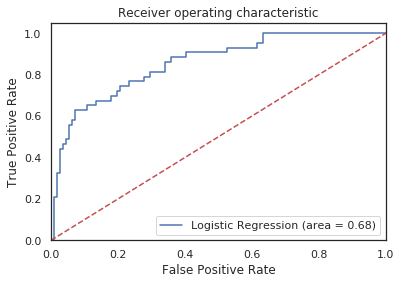

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()